In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Data Preprocessing & Visualization

Step1: Load the dataset to a DF. 

In [2]:
df = pd.read_csv('arabica_data_cleaned.csv', header=None)
new_header = df.iloc[0] 
df = df[1:-1] 
df.columns = new_header 

Step2: Select features and target in the data set.

There are 44 columns in the dataframe.Some of columns of for indexing purpose, such as "NaN", "Lot Number". Some coulmns are descriptive feature, such as "Farm name", "Country of Origin", "Company name", which will not be included in the model training process. For convinience purposes, we are selecting those numeric feature, which mainly focuses on the physical property and production conditions of the coffee beans as features of interests. Selected feature include:

(1) Aroma

(2) Flavor

(3) Aftertaste

(4) Acidity 

(5) Body

(6) Balance

(7) Uniformity

(8) Clean.Cup

(9) Sweetness

(10) Cupper.Points

(11) Moisture

(12) Quakers

(13) Category.One.Defects

(14) Category.Two.Defects

(15) altitude_mean_meters

Target feature is "Total.Cup.Points"

Step3: Preprocessing

In [3]:
#remove unneccesary coloums
df_clean = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects', 'altitude_mean_meters', 'Total.Cup.Points']]
df_clean = df_clean.astype(float)

In [4]:
#Remove altitude that appaently out of boundary.
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].replace(190164, np.nan)
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].replace(110000, np.nan)
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].replace(11000, np.nan)

In [5]:
#fill na with average value
altitude_mean_val = df_clean['altitude_mean_meters'].mean()
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].fillna(altitude_mean_val)
df_clean['Quakers'] = df_clean['Quakers'].fillna(0)

In [6]:
#All the nan fileds have been filled.
df_clean.isnull().sum()

0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Moisture                0
Quakers                 0
Category.One.Defects    0
Category.Two.Defects    0
altitude_mean_meters    0
Total.Cup.Points        0
dtype: int64

In [7]:
#Display the cleaned data frame
df_clean

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,altitude_mean_meters,Total.Cup.Points
1,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,0.12,0.0,0.0,0.0,2075.00,90.58
2,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,0.12,0.0,0.0,1.0,2075.00,89.92
3,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,0.00,0.0,0.0,0.0,1700.00,89.75
4,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,0.11,0.0,0.0,2.0,2000.00,89.00
5,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,0.12,0.0,0.0,2.0,2075.00,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,7.00,6.33,6.17,6.50,6.67,6.17,8.00,8.00,8.00,6.33,0.10,0.0,0.0,4.0,1450.00,69.17
1307,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,0.11,0.0,0.0,20.0,900.00,68.33
1308,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,0.14,0.0,8.0,16.0,350.00,67.92
1309,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,0.13,0.0,1.0,5.0,1100.00,63.08


Step 4: data description and visualization

In [8]:
col_names = df_clean.columns.tolist()
feature_names = col_names[:-1]
target_name = col_names[-1]
print("Features:\n", feature_names)
print("Target:\n", target_name)

Features:
 ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects', 'altitude_mean_meters']
Target:
 Total.Cup.Points


In [9]:
#Data description
def display_statistics(value, name):
    print('Statistics for ' + name + ':\n ')
    print ('MIN(' + name + ')= ' + str(np.amin(value)))  # minimum value in the list
    print ('MAX(' + name + ')= ' + str(np.amax(value)))  # maximum value
    print ('RANGE(' + name + ')= ' + str(np.ptp(value))) # the range of the values
    print ('MEAN(' + name + ')= ' + str(np.mean(value)))  # the mean of the values
    print ('STD(' + name + ')= ' + str(np.std(value, ddof=1))) # the standard deviation of the values
    print ('VARIANCE(' + name + ')= ' + str(np.var(value, ddof=1)))  # the variance of the values
    print ('COUNT(' + name + ')= ' + str(value.count()))  # the count of the values
    print ('25% PERCENTILES(' + name + ')= ' + str(value.quantile(.25)))  # the 25% percentile of the values
    print ('50% PERCENTILES(' + name + ')= ' + str(value.quantile(.5)))  # the 50% percentile of the values
    print ('75% PERCENTILES(' + name + ')= ' + str(value.quantile(.75)))  # the 75% percentile of the values
    print('\n\n');

for col_name in col_names:
    display_statistics(df_clean[col_name], col_name)

Statistics for Aroma:
 
MIN(Aroma)= 5.08
MAX(Aroma)= 8.75
RANGE(Aroma)= 3.67
MEAN(Aroma)= 7.569580152671755
STD(Aroma)= 0.3158454393310044
VARIANCE(Aroma)= 0.09975834154619517
COUNT(Aroma)= 1310
25% PERCENTILES(Aroma)= 7.42
50% PERCENTILES(Aroma)= 7.58
75% PERCENTILES(Aroma)= 7.75



Statistics for Flavor:
 
MIN(Flavor)= 6.08
MAX(Flavor)= 8.83
RANGE(Flavor)= 2.75
MEAN(Flavor)= 7.523809160305342
STD(Flavor)= 0.3418970268922596
VARIANCE(Flavor)= 0.1168935769977665
COUNT(Flavor)= 1310
25% PERCENTILES(Flavor)= 7.33
50% PERCENTILES(Flavor)= 7.58
75% PERCENTILES(Flavor)= 7.75



Statistics for Aftertaste:
 
MIN(Aftertaste)= 6.17
MAX(Aftertaste)= 8.67
RANGE(Aftertaste)= 2.5
MEAN(Aftertaste)= 7.403343511450382
STD(Aftertaste)= 0.3498673277080778
VARIANCE(Aftertaste)= 0.12240714699759152
COUNT(Aftertaste)= 1310
25% PERCENTILES(Aftertaste)= 7.25
50% PERCENTILES(Aftertaste)= 7.42
75% PERCENTILES(Aftertaste)= 7.58



Statistics for Acidity:
 
MIN(Acidity)= 5.25
MAX(Acidity)= 8.75
RANGE(Acidity)= 3

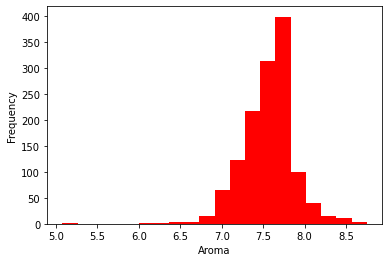

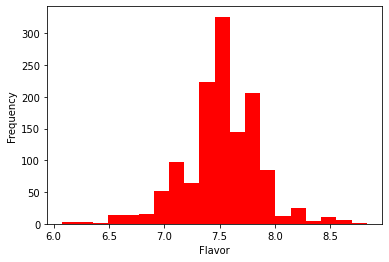

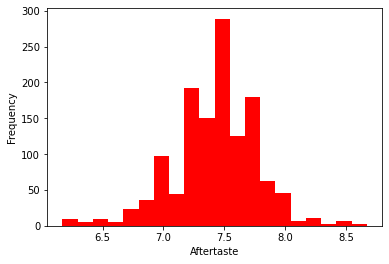

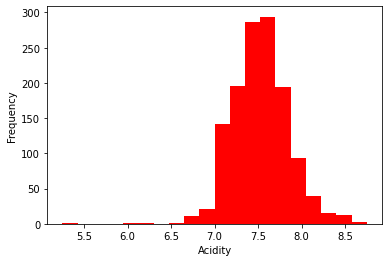

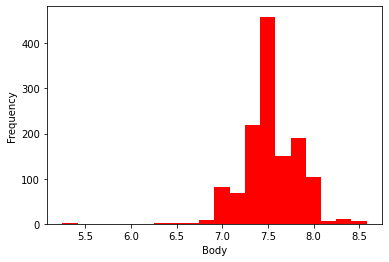

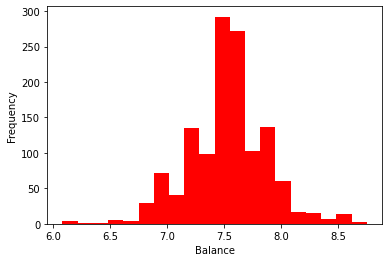

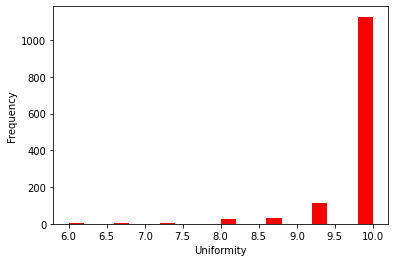

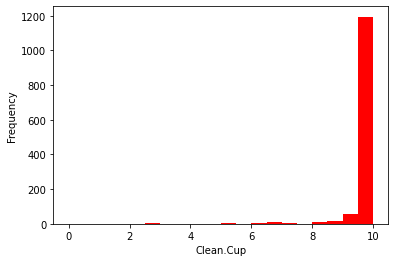

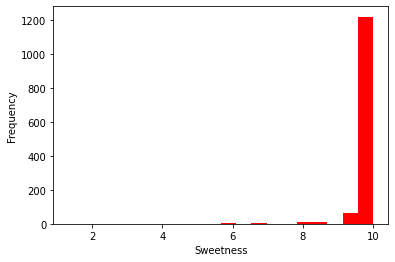

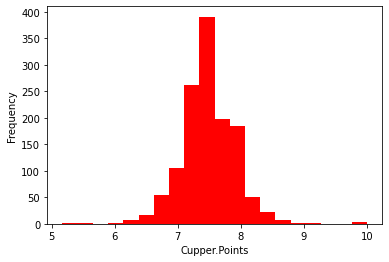

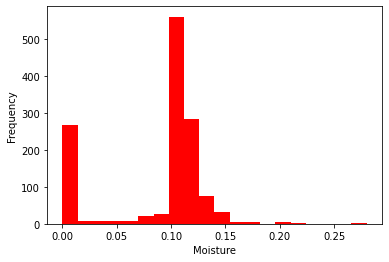

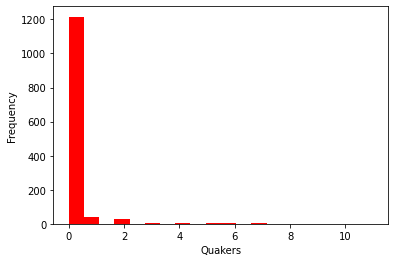

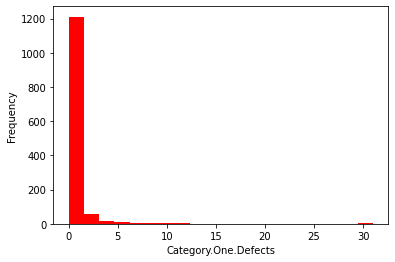

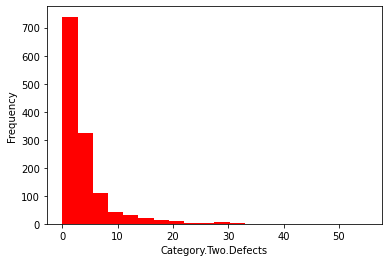

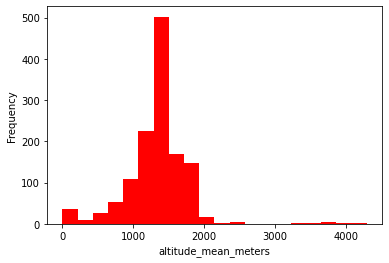

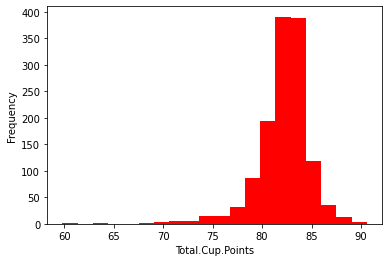

In [10]:
def plot_hist(i):
    fig_new = plt.figure()
    ax_new = fig_new.add_subplot(1, 1, 1)
    n, bins, patches = ax_new.hist(df_clean[col_names[i]], bins=20, color='red')
    ax_new.set_xlabel(col_names[i])
    ax_new.set_ylabel('Frequency')
    
for i in range(len(col_names)):
    plot_hist(i)
    


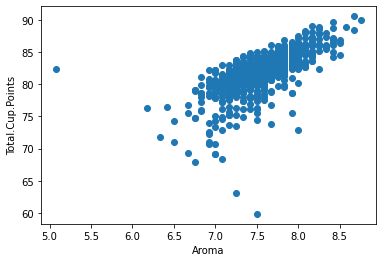

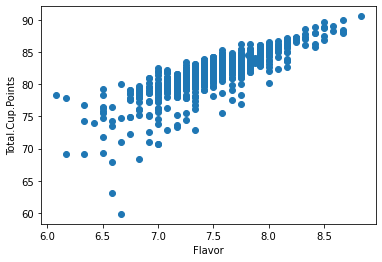

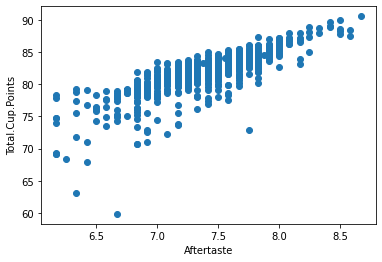

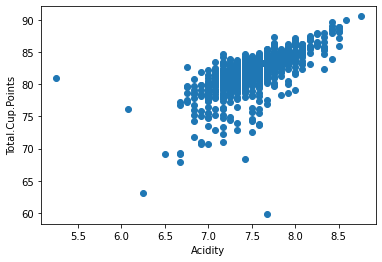

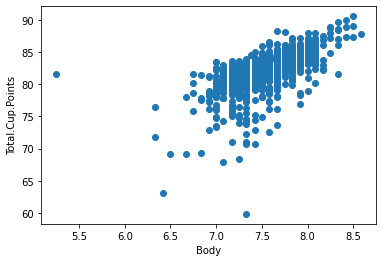

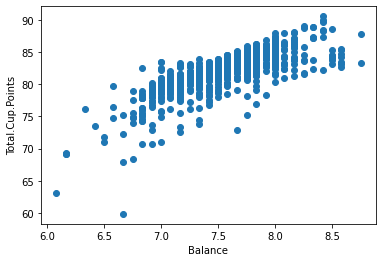

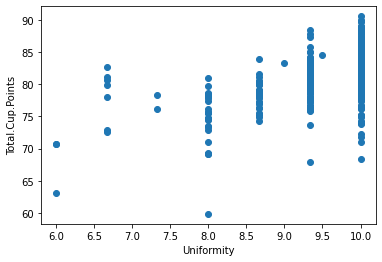

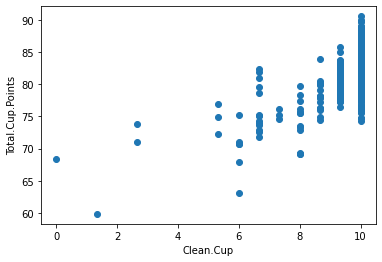

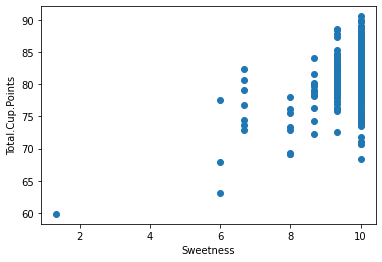

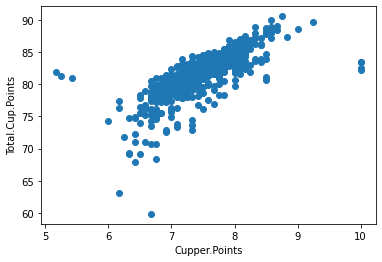

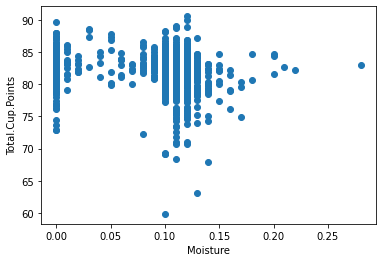

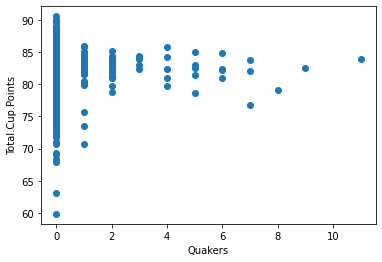

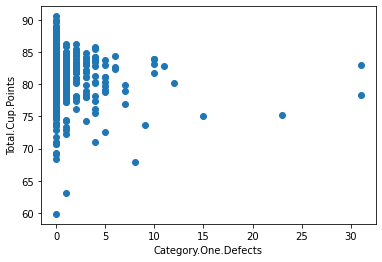

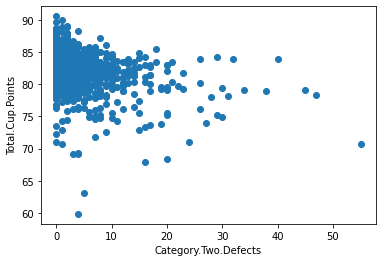

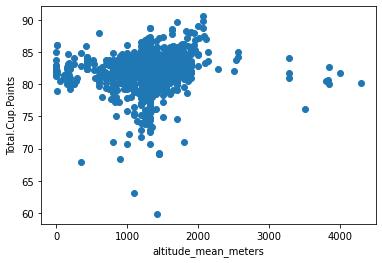

In [11]:
def plot_scatter(i):
    fig_new = plt.figure()
    ax_new = fig_new.add_subplot(1, 1, 1)
    ax_new.scatter(df_clean[col_names[i]], df_clean[target_name])
    ax_new.set_xlabel(col_names[i])
    ax_new.set_ylabel(target_name)
    
for i in range(len(col_names)-1):
    plot_scatter(i)


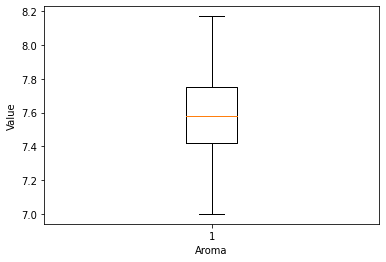

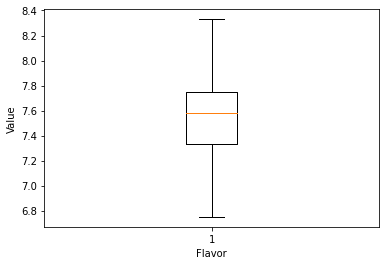

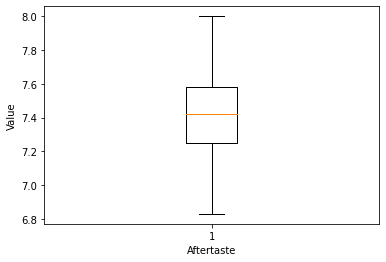

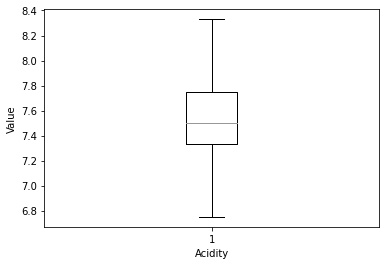

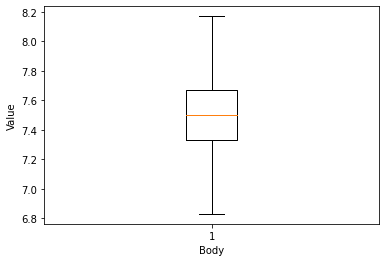

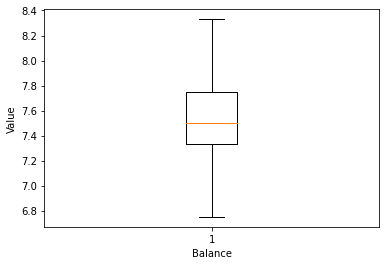

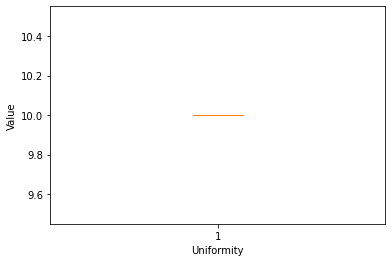

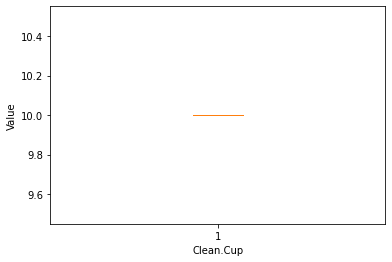

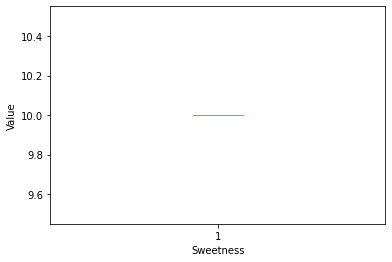

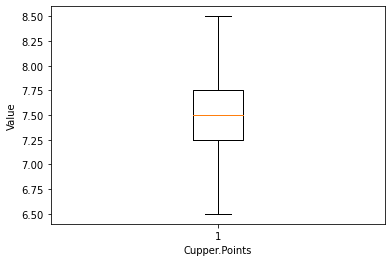

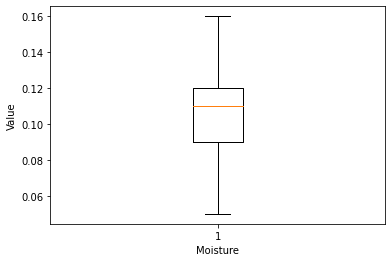

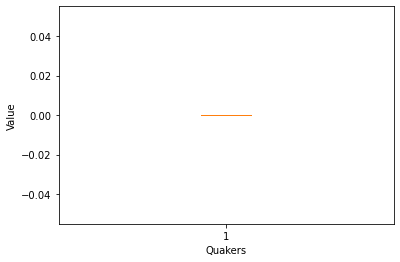

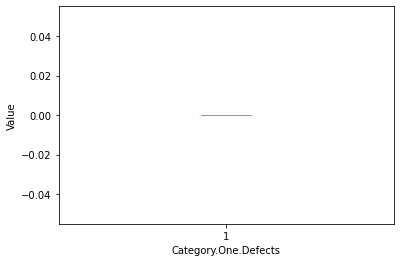

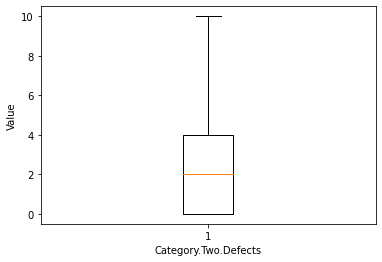

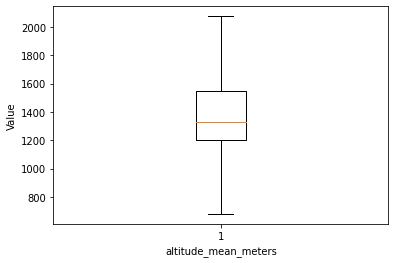

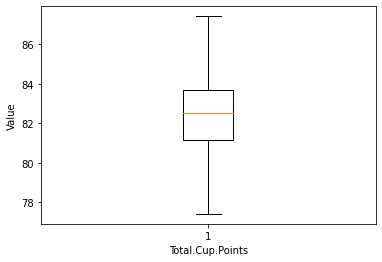

In [12]:
def plot_box(i):
    fig_new = plt.figure()
    ax_new = fig_new.add_subplot(1, 1, 1)
    ax_new.boxplot(df_clean[col_names[i]], showfliers=False)
    ax_new.set_xlabel(col_names[i])
    ax_new.set_ylabel('Value')
    
for i in range(len(col_names)):
    plot_box(i)